In [93]:
%matplotlib inline

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [99]:
from ydata_profiling import ProfileReport

df = pd.read_csv('Creditcard_data.csv')
profile = ProfileReport(df, title="Symptoms Data Report", explorative=True)
profile.to_file("output2.html")

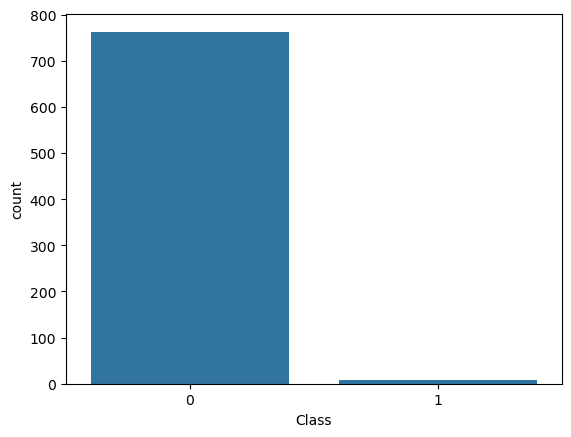

In [101]:
sns.countplot(x='Class', data=df)
plt.show()

In [103]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [105]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [107]:
from sklearn.model_selection import cross_val_score
cross_val_score(c, x_train, y_train, cv=5, scoring='accuracy').mean()

D:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.978940466824023

In [109]:
from sklearn import set_config
set_config(display='diagram')


In [111]:
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("After SMOTE (train):", Counter(y_train_smote))

After SMOTE (train): Counter({0: 609, 1: 609})


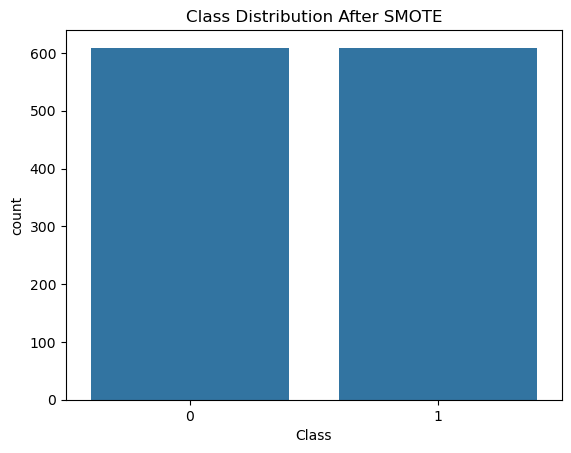

In [113]:
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.show()


In [115]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler, TomekLinks
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [117]:
sampling_techniques={
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Tomek': TomekLinks(),
    'NearMiss': NearMiss()
}

In [119]:
models = {
    'Logistic': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

In [123]:
results = {}
for model_name, model in models.items():
    results[model_name] = {}
    for sampler_name, sampler in sampling_techniques.items():
        pipeline = Pipeline([
            ('sampler', sampler),
            ('model', model)
        ])

        score = cross_val_score(pipeline,x_train,y_train,cv=5,scoring='accuracy').mean()
        results[model_name][sampler_name]=score * 100

In [125]:
results=pd.DataFrame(results)
results

,Logistic,SVM,DecisionTree,RandomForest,KNN
RandomOverSampler,88.168109,74.550223,96.443745,98.704432,95.946761
RandomUnderSampler,64.337792,65.479937,55.076056,63.703121,64.508261
SMOTE,88.981117,65.302911,95.793339,98.705744,72.777341
Tomek,97.894047,98.704432,97.571466,98.704432,98.704432
NearMiss,29.277472,43.263834,24.405980,42.469184,38.432992


POINTS TO REMEMBER:
1. Tomek gives high accuracy in SVM,Logisitc and KNN beacuse it removes those data points of the 2 classes that lie close to each other. This helps to seperate the 2 classes better at the decision boundary.
2. Under Sampler gives low accuracy because it removes too much information from the majority class that the model becomes underfitting
3. Nearmiss is also an undersampling technique that's why it also performs badly
4. Oversampling makes the dataset balanced sufficiently balanced. however it causes overfitting beacuse same rows are repeated multiple times for the minority class
5. SMOTE gives mixed results and this shows that it overfits the data lesser as comapred to oversampling. this means that SMOTE provides better generalization on the training data using synthetic data points.